In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("House_price_pridiction.csv")

In [3]:
df

,bedrooms,bathrooms,sqft_living,floors,price
0,3,1.50,1340,1.5,3.130000e+05
1,5,2.50,3650,2.0,2.384000e+06
2,3,2.00,1930,1.0,3.420000e+05
3,3,2.25,2000,1.0,4.200000e+05
4,4,2.50,1940,1.0,5.500000e+05
...,...,...,...,...,...
4595,3,1.75,1510,1.0,3.081667e+05
4596,3,2.50,1460,2.0,5.343333e+05
4597,3,2.50,3010,2.0,4.169042e+05
4598,4,2.00,2090,1.0,2.034000e+05


Text(0, 0.5, 'price')

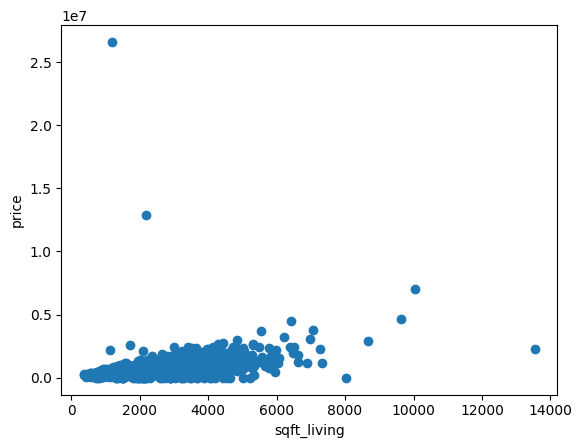

In [4]:
plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')

In [41]:
X = df.drop('price',axis=1)
y = df.iloc[:,-1]

In [39]:
x

0       1340
1       3650
2       1930
3       2000
4       1940
        ... 
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, Length: 4600, dtype: int64

In [20]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
X_test

,bedrooms,bathrooms,sqft_living,floors
4111,3,1.50,1460,1.0
1996,4,1.75,1560,1.0
2307,5,2.50,2340,2.0
3607,2,1.75,1110,2.0
1519,4,2.50,2798,2.0
...,...,...,...,...
2516,4,2.50,2960,2.0
993,4,2.50,1990,2.0
3713,3,1.50,1620,1.0
4541,3,2.75,2210,2.0


In [47]:
y_test

4111     232000.0
1996     299950.0
2307    1085000.0
3607     229800.0
1519     499950.0
          ...    
2516     883000.0
993      260000.0
3713     219950.0
4541     216000.0
3016    1100000.0
Name: price, Length: 920, dtype: float64

In [48]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

ValueError: cannot reshape array of size 4 into shape (1,1)

In [49]:
y_pred=lr.predict(X_test)

Text(0, 0.5, 'Package(in lpa)')

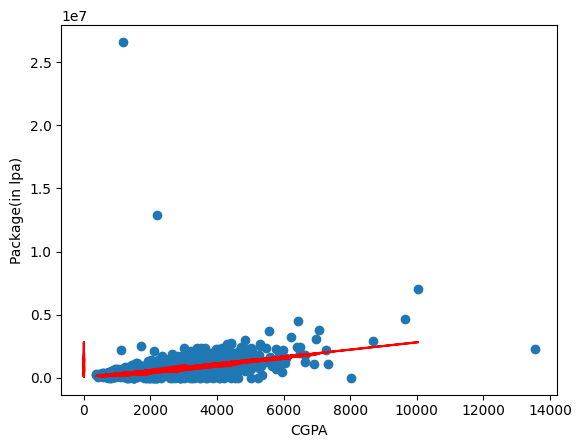

In [50]:
plt.scatter(df['sqft_living'],df['price'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [51]:
m = lr.coef_
m

array([-61468.08230624,   3872.6148616 ,    299.40172355,   3018.65912567])

In [52]:
b = lr.intercept_
b

106497.82197606046

In [53]:
# y = mx + b

m * 8.58 + b

array([-420898.3242115 ,  139724.85748861,  109066.6887641 ,
        132397.91727431])

In [54]:
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 204343.64


In [55]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")



Mean Squared Error: 826595732508.15
